In [1]:
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# データを読みこむ
games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

データの変数を見てから、データから何を分析したらいいのはわかりやすくなる。

In [3]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

自然な質問はいろいろある。まずは、Global_SalesとCriticの変数の間には相関係がある？

相関係を研究するには相関係を探して、散布図を描く。

In [4]:
games.Global_Sales.corr(games.Critic_Score)

0.2454706775067545

In [5]:
games.Global_Sales.corr(games.User_Score)

0.088139172792311996

普通は相関係数が０．4より小さかったら、相関係が弱いという。なので、ここには相関係があるとは言えない。

Global_Salesとの間には相関係がないけど、JP_SalesとNA_Salesとの間には相関係があるかもしれない。

In [6]:
games.JP_Sales.corr(games.Critic_Score)

0.15259333475971154

In [7]:
games.JP_Sales.corr(games.User_Score)

0.12559794056607054

In [8]:
games.NA_Sales.corr(games.Critic_Score)

0.24075498707532109

In [9]:
games.NA_Sales.corr(games.User_Score)

0.086199861421284357

ここにも大切な相関係があるとは言えない。

可視化をしても、確認することができる。ご覧の通り（下）、大切な相関係がない。

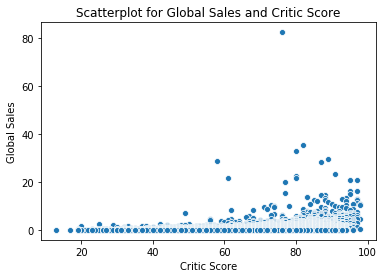

In [10]:
# 散布図
sns.scatterplot(x="Critic_Score", y="Global_Sales", data=games)
plt.ylabel("Global Sales")
plt.xlabel("Critic Score")
plt.title("Scatterplot for Global Sales and Critic Score")
plt.show()

次の質問は最大商売されたゲームについてだ。それらのマーケットで、どんなゲームが最大の商売を受けた？

In [11]:
games.iloc[games.NA_Sales.idxmax()].Name

'Wii Sports'

In [12]:
games.iloc[games.JP_Sales.idxmax()].Name

'Pokemon Red/Pokemon Blue'

In [13]:
games.iloc[games.Other_Sales.idxmax()].Name

'Grand Theft Auto: San Andreas'

In [14]:
games.iloc[games.Global_Sales.idxmax()].Name

'Wii Sports'

ご覧の通り、Wii Sportsは商売の戦場で勝った。だが、日本ではポケモンが最大商売を持った。その他の商売はGrand Theft Auto: San Andreasだった。

最大値は自然な質問だが、第二目と第三目のゲームを見たら、面白くなるかもしれない。商売の順番を探す？？？？

今、マーケットの商売を比較する。

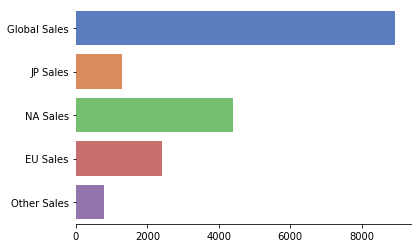

In [15]:
# 商売を比較するための棒グラフ
gs = sum(games.Global_Sales)
jp = sum(games.JP_Sales)
na = sum(games.NA_Sales)
eu = sum(games.EU_Sales)
ot = sum(games.Other_Sales)

sns.barplot(x = [gs, jp, na, eu, ot],
            y=['Global Sales', 'JP Sales', 'NA Sales', 'EU Sales', 'Other Sales'], 
            palette="muted")
sns.despine(left = True)
plt.show()

質問していいよ。

１）任天堂は？
２）これは円だか、ドルだか？

In [16]:
# 出版社はいくらある？
games.Publisher.value_counts()

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
BushiRoad                          1
RED Entertainment                  1
inXile Entertainment               1
Crytek                             1
Marvelous Games                    1
Name: Publisher, Length: 582, dtype: int64

出版社の誰が一番いい商売を得たか？（１０位だけ）

In [17]:
# 出版社に寄って、全商売を探す。
group = games.Global_Sales.groupby(games.Publisher)

In [18]:
len(group)# 長さは同じなので、役に立った。　？？？？

582

In [19]:
# 描写はある？
group.describe()

,count,mean,std,min,25%,50%,75%,max
Publisher,,,,,,,,
10TACLE Studios,3.0,0.036667,0.020817,0.02,0.0250,0.030,0.0450,0.06
1C Company,3.0,0.033333,0.020817,0.01,0.0250,0.040,0.0450,0.05
20th Century Fox Video Games,5.0,0.388000,0.231019,0.22,0.2500,0.340,0.3400,0.79
2D Boy,1.0,0.040000,NaN,0.04,0.0400,0.040,0.0400,0.04
3DO,36.0,0.281111,0.272636,0.01,0.0950,0.170,0.3750,1.28
...,...,...,...,...,...,...,...,...
id Software,1.0,0.030000,NaN,0.03,0.0300,0.030,0.0300,0.03
imageepoch Inc.,2.0,0.020000,0.014142,0.01,0.0150,0.020,0.0250,0.03
inXile Entertainment,1.0,0.100000,NaN,0.10,0.1000,0.100,0.1000,0.10


In [20]:
# 全てのグループの商売を作る
agg_values = list(range(len(group)))
agg_names = list(range(len(group)))
for i in list(range(len(group))):
    pub_names = list(group.indices.keys())
    agg_names[i] = pub_names[i] 
    agg_values[i] = sum(group.get_group(pub_names[i]))

In [21]:
sum(group.get_group('Nintendo')) # 確認できる？

1788.8099999999977

In [22]:
agg_values[361]

1788.8099999999977

In [23]:
agg_names.index('Nintendo') # 確認できる？

361

確認できた。

In [24]:
# 全てのグループの商売を持つシリーズ
pub_sum = Series( agg_values , index = agg_names)

In [25]:
# 最大の１０出版社
pub_ser = pub_sum.sort_values().tail(10)

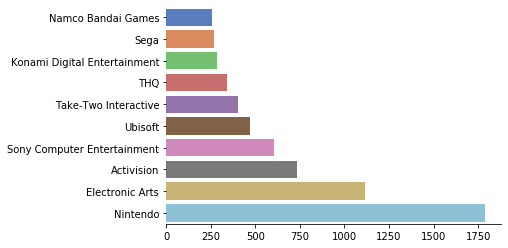

In [26]:
# 棒グラフを作って
sns.barplot(x = pub_ser.values,
            y=pub_ser.index, 
            palette="muted")
sns.despine(left = True)
plt.show()

 面白いことに、任天堂は一番いい出版社だ。

これを全てもう一度やってみよう、だが、今回はゲームのタイプのために。

In [27]:
# 上のコードを使う
genre_g = games.Global_Sales.groupby(games.Genre)

In [28]:
# 全てのグループの商売を作る
agg_values = list(range(len(genre_g)))
agg_names = list(range(len(genre_g)))
for i in list(range(len(genre_g))):
    genre_names = list(genre_g.indices.keys())
    agg_names[i] = genre_names[i] 
    agg_values[i] = sum(genre_g.get_group(genre_names[i]))

In [29]:
# 全てのグループの商売を持つシリーズ
genre_sum = Series( agg_values , index = agg_names)

In [30]:
# 最大の１０出版社
genre_ser = genre_sum.sort_values().tail(10)

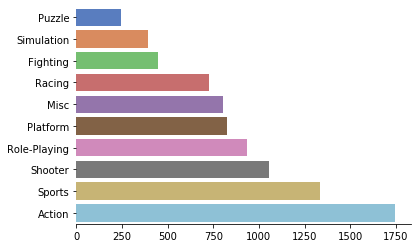

In [31]:
# 棒グラフを作って
sns.barplot(x = genre_ser.values,
            y=genre_ser.index, 
            palette="muted")
sns.despine(left = True)
plt.show()

Actionは一番いいだったね。

In [32]:
# Ratingのグループ
rating_g = games.Global_Sales.groupby(games.Rating)

In [33]:
# 全てのグループの商売を作る
agg_values = list(range(len(rating_g)))
agg_names = list(range(len(rating_g)))
for i in list(range(len(rating_g))):
    rating_names = list(rating_g.indices.keys())
    agg_names[i] = rating_names[i] 
    agg_values[i] = sum(rating_g.get_group(rating_names[i]))

In [34]:
# 全てのグループの商売を持つシリーズ
rating_sum = Series( agg_values , index = agg_names)

In [35]:
# 最大の１０出版社
rating_ser = rating_sum.sort_values().tail(10)

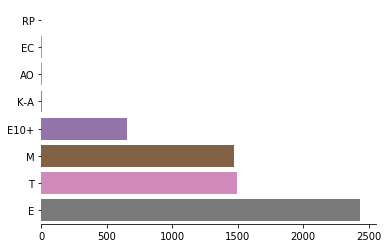

In [36]:
# 棒グラフを作って
sns.barplot(x = rating_ser.values,
            y=rating_ser.index, 
            palette="muted")
sns.despine(left = True)
plt.show()

みんなのためのゲームが売られたね。

In [37]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

ゼルダの伝説、マリオ、メトロイドに見てみよう。

In [125]:
# ゼルダの伝説のゲームを探す
z_str = 'The Legend of Zelda'
z_entries = Series(dtype = object)
for i in list(range(len(games.Name.values))):
    if z_str in list(games.Name.values)[int(i)]:
        print('hai')
        #z_entries[games.Name.values[i]] = i


hai
hai
hai
hai
hai
hai
hai
hai
hai
hai
hai
hai
hai


TypeError: argument of type 'float' is not iterable

In [124]:
type(list(range(len(games.Name.values)))[0])

int

エラーがある。でも、下を見たら、できたとすぐにわかる。

In [83]:
z_entries

The Legend of Zelda: Ocarina of Time          259
The Legend of Zelda: Twilight Princess        107
The Legend of Zelda                           124
The Legend of Zelda: Phantom Hourglass        200
The Legend of Zelda: A Link to the Past       553
The Legend of Zelda: The Wind Waker           233
The Legend of Zelda: Skyward Sword            306
The Legend of Zelda: Link's Awakening         322
The Legend of Zelda: Majora's Mask            400
The Legend of Zelda: Spirit Tracks            408
The Legend of Zelda: A Link Between Worlds    448
dtype: int64

商売を出そう。

In [87]:
games.iloc[z_entries.values].Global_Sales.sum()

47.920000000000002

In [91]:
# マリオ
m_str = 'Mario'
m_entries = Series(dtype = object)
for i in list(range(len(games.Name.values))):
    if m_str in games.Name.values[i]:
        m_entries[games.Name.values[i]] = i

TypeError: argument of type 'float' is not iterable

In [93]:
games.iloc[m_entries.values].Global_Sales.sum()

379.02000000000004

In [104]:
# メトロイド
me_str = 'Metroid'
me_entries = Series(dtype = object)
for i in list(range(len(games.Name.values))):
    if me_str in games.Name.values[i]:
        me_entries[games.Name.values[i]] = i

TypeError: argument of type 'float' is not iterable

In [105]:
games.iloc[me_entries.values].Global_Sales.sum()

5.5499999999999998

In [106]:
games.iloc[me_entries.values]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
517,Metroid Prime,GC,2002.0,Shooter,Nintendo,1.96,0.67,0.10,0.09,2.82,97.0,70.0,9.3,747.0,Retro Studios,T
550,Metroid,NES,1986.0,Action,Nintendo,1.33,0.31,1.04,0.05,2.73,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
'Metroid Prime Hunters' in games.Name.values

True

In [108]:
me_entries

Metroid Prime    517
Metroid          550
dtype: int64

In [142]:
# PandasかNumpy
games.Name

ValueError: Array conditional must be same shape as self